<a href="https://colab.research.google.com/github/Imran123885/Harvard_AI_Bootcamp_Work/blob/main/imran_mirza_d1h1vc_hyperparameters_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hyperparameters

Harvard AI Bootcamp

Read: https://towardsdatascience.com/parameters-and-hyperparameters-aa609601a9ac


Hyperparameter tuning is a massively important area of ML research and engineering, and it comprises a lot of what ML engineers and researchers do daily.

In this homework, we'll introduce some of the most fundamental hyperparameters that are commonly used in ML and go over Grid Search and Random Search, two commonly used hyperparameter tuning algorithms.


## Make a copy of this notebook! Editing directly will not be saved.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import itertools
import random

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#HYPERPARAMETERS

#TRAINING HYPERPARAMETERS
BATCH_SIZE = 10 #choose between 1 and 10
NUM_EPOCHS = 5 #choose between 1 and 5
LR = 0.001 #choose between 0.0001 to 0.1
OPTIM_ALG = "adam" #choose from ['sgd', 'adam']

#ARCHITECTURE HYPERPARAMETERS
NUM_NEURONS = 100 #anything!
ACTIVATION_FN = "gelu" #choose from ['relu', 'sigmoid', 'gelu', 'tanh']

activation_fns = {'relu': nn.ReLU(), 'sigmoid': nn.Sigmoid(), 'gelu': nn.GELU(), 'tanh': nn.Tanh()}

In [ ]:
#Load the Fashion MNIST dataset, a dataset of grayscaled articles of clothing

#transform is applied to all the datapoints in our dataset and commonly used to normalize/preprocess data. here, all we do is convert to tensor
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)



tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])


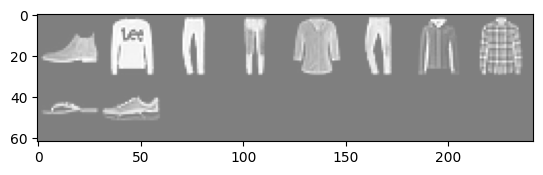

torch.Size([3, 62, 242])
Ankle boot      	Pullover      	Trouser      	Trouser      	Shirt      	Trouser      	Coat      	Shirt      	Sandal      	Sneaker


In [ ]:
images, labels = next(iter(testloader))
# Fashion MNIST labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    print(img.shape)


# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print('      \t'.join(f'{classes[labels[j]]}' for j in range(BATCH_SIZE)))

In [ ]:
INPUT_SHAPE = [3,62,242]

OUTPUT_SHAPE = len(labels)


def create_net(num_neurons, activation_fn):
  #TODO:
  class Net(nn.Module):
      def __init__(self):
        super().__init__()
        input_shape = 1
        for i in range(len(INPUT_SHAPE)):
          input_shape = input_shape*INPUT_SHAPE[i]
        self.layer1 = nn.Linear(input_shape, num_neurons)
        self.activation = activation_fn
        self.layer2 = nn.Linear(num_neurons, OUTPUT_SHAPE)
      def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
  return Net()
net = create_net(NUM_NEURONS, activation_fns[ACTIVATION_FN])

In [ ]:
#Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()

if OPTIM_ALG == "sgd":
  optimizer = optim.SGD(net.parameters(), lr=LR)
elif OPTIM_ALG == "adam":
  optimizer = optim.Adam(net.parameters(), lr = LR)

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

def train_net(trainloader, criterion, optimizer, net, num_epochs):
  #TODO: implement a function that trains a neural network given the above inputs and returns the trained net
  for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f"Epoch {epoch + 1}, Batch {i + 1}: Loss {running_loss / 100:.3f}")
            running_loss = 0.0

    print('Finished Training')
    return net

net = train_net(trainloader, criterion, optimizer, net, NUM_EPOCHS)

Device cpu


TypeError: ignored

In [ ]:
# Test the network on the test data
def test_acc(net, testloader):
  #TODO: return the accuracy of the model on all the images in the testdataset
  pass

print(f'Accuracy of the network on the 10000 test images: {test_acc(net, testloader)}%')

Accuracy of the network on the 10000 test images: None%


## Grid Search

Read about grid search and random search here: https://neptune.ai/blog/hyperparameter-tuning-in-python-complete-guide

They're both pretty simple methods. For grid search, itertools.product will be helpful and for random search, random.choice will be helpful.

In [ ]:
from torch.utils.data import RandomSampler, DataLoader, Subset

#We'll use a subset of the training/testing data to make things run faster
search_trainset = Subset(trainset, np.arange(1000))
search_testset = Subset(testset, np.arange(1000))

# Define the hyperparameter space
batch_sizes = [1, 5]
num_epochs = [1, 5]
learning_rates = [0.001, 0.01]
nums_neurons = [100, 1000]
activation_fns = {'relu': nn.ReLU(), 'gelu': nn.GELU()}
optim_alg = "adam" #we'll just only use adam here because it will cut runtime in half and adam is just plainly superior than sgd

In [ ]:
#TODO Implement gridsearch
best_accuracy = 0
best_params = {}

## Random Search



In [ ]:
#TODO implement random search
best_accuracy = 0
best_params = {}
num_iterations = 16  # Number of random combinations to try